In [2]:
import numpy as np

In [3]:
np.random.seed(444)

In [6]:
x = np.random.choice([False,True], size=100000)
x

array([False,  True,  True, ..., False, False, False])

In [8]:
def count_transitions(x) -> int:
    count = 0
    for i, j in zip(x[:-1],x[1:]):
        if j and not i:
            count +=1
    return count

count_transitions(x)

25050

In [9]:
np.count_nonzero(x[:-1] < x[1:])

25050

In [10]:
from timeit import timeit
setup = 'from __main__ import count_transitions, x; import numpy as np'
num = 1000
t1 = timeit('count_transitions(x)', setup=setup, number=num)
t2 = timeit('np.count_nonzero(x[:-1] < x[1:])', setup=setup, number=num)
print("t1: ", t1)
print("t2: ", t2)
print("Speed difference: {:0.1f}x".format(t1/t2))

t1:  6.0132393209996735
t2:  0.08802526899944496
Speed difference: 68.3x


In [11]:
prices = np.full(100, fill_value=np.nan)
prices

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [14]:
prices[[0,25,60,-1]] = [80.,30.,75.,50.]
prices

array([80., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 30.,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, 75., nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, 50.])

In [15]:
x=np.arange(len(prices))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [16]:
is_valid = ~np.isnan(prices)
is_valid

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [18]:
prices = np.interp(x=x,xp=x[is_valid],fp=prices[is_valid])
prices

array([80.        , 78.        , 76.        , 74.        , 72.        ,
       70.        , 68.        , 66.        , 64.        , 62.        ,
       60.        , 58.        , 56.        , 54.        , 52.        ,
       50.        , 48.        , 46.        , 44.        , 42.        ,
       40.        , 38.        , 36.        , 34.        , 32.        ,
       30.        , 31.28571429, 32.57142857, 33.85714286, 35.14285714,
       36.42857143, 37.71428571, 39.        , 40.28571429, 41.57142857,
       42.85714286, 44.14285714, 45.42857143, 46.71428571, 48.        ,
       49.28571429, 50.57142857, 51.85714286, 53.14285714, 54.42857143,
       55.71428571, 57.        , 58.28571429, 59.57142857, 60.85714286,
       62.14285714, 63.42857143, 64.71428571, 66.        , 67.28571429,
       68.57142857, 69.85714286, 71.14285714, 72.42857143, 73.71428571,
       75.        , 74.35897436, 73.71794872, 73.07692308, 72.43589744,
       71.79487179, 71.15384615, 70.51282051, 69.87179487, 69.23

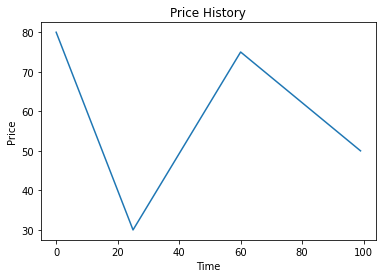

In [20]:
import matplotlib.pyplot as plt

mn = np.argmin(prices)
mx = mn + np.argmax(prices[mn:])
kwargs = {'markersize': 12, 'linestyle': ''}

fig, ax = plt.subplots()
ax.plot(prices)
ax.set_title('Price History')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.plot(mn, prices[mn], color='green', **kwargs)
ax.plot(mn, prices[mx], color='red', **kwargs)

In [21]:
prices += np.random.randn(len(prices)) * 2
prices

array([79.98627674, 76.85844442, 76.7416259 , 74.45656811, 68.0561963 ,
       69.87459186, 67.60898551, 66.50716161, 62.56696737, 60.25322462,
       59.08659529, 57.40991315, 57.20652103, 55.02445346, 51.04022502,
       51.32099915, 46.45346831, 49.75119447, 43.76013732, 41.99074981,
       42.00175037, 37.97481115, 38.4752173 , 35.29294558, 31.82986273,
       25.92724501, 31.89126964, 33.71667052, 32.77344659, 36.40388628,
       34.82009966, 37.31443538, 38.3748311 , 39.5776252 , 45.94223352,
       45.34050361, 42.02132239, 48.05933229, 45.66340351, 46.20362742,
       49.68335167, 50.5803186 , 52.44238802, 53.67733212, 52.54084312,
       57.70048197, 55.90168386, 59.02448668, 58.92419936, 57.99801425,
       66.11967812, 63.08189275, 65.55040542, 65.68612189, 69.95467062,
       67.09183135, 69.34100132, 70.17228557, 74.74986095, 76.18155367,
       76.71505581, 73.18061994, 72.27951091, 73.42202434, 73.07276306,
       69.82323796, 63.39322816, 69.59173187, 68.7549254 , 68.68

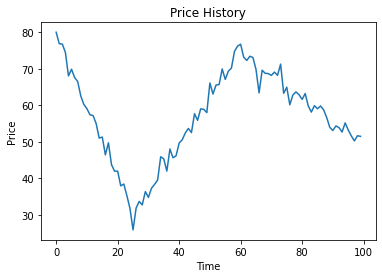

In [22]:
mn = np.argmin(prices)
mx = mn + np.argmax(prices[mn:])
kwargs = {'markersize': 12, 'linestyle': ''}

fig, ax = plt.subplots()
ax.plot(prices)
ax.set_title('Price History')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.plot(mn, prices[mn], color='green', **kwargs)
ax.plot(mn, prices[mx], color='red', **kwargs)

In [25]:
cummin = np.minimum.accumulate

def profit_with_numpy(prices):
    """Prices minus cumulative min price, element-wise"""
    prices = np.asarray(prices)
    return np.max(prices-cummin(prices))

profit_with_numpy(prices)

50.787810796667046

In [27]:
def profit(prices):
    max_px = 0
    min_px = prices[0]
    for px in prices[1:]:
        min_px = min(min_px, px)
        max_px = max(px - min_px, max_px)
    return max_px

In [28]:
np.allclose(profit_with_numpy(prices), profit(prices))

True

In [30]:
arr = np.array([[1,2,3],[10,20,30]])
print(arr, arr.shape)

[[ 1  2  3]
 [10 20 30]] (2, 3)


In [31]:
arr.sum(axis=0)

array([11, 22, 33])

In [32]:
arr.sum(axis=1)

array([ 6, 60])

In [33]:
a = np.array([1.5,2.5,3.5])
b = np.array([10.,5.,1.])
a/b

array([0.15, 0.5 , 3.5 ])

In [35]:
sample = np.random.normal(loc=[2.,20,], scale=[1.,3.5], size=(3,2))
sample

array([[ 2.03311388, 18.04808191],
       [ 2.64357599, 18.05995121],
       [ 1.58863181, 16.999597  ]])

In [36]:
mu = sample.mean(axis=0)
mu

array([ 2.08844056, 17.70254337])

In [37]:
print('sample:', sample.shape, '| means:', mu.shape)

sample: (3, 2) | means: (2,)


In [38]:
sample - mu 

array([[-0.05532668,  0.34553854],
       [ 0.55513543,  0.35740784],
       [-0.49980875, -0.70294637]])

In [39]:
(sample - sample.mean(axis=0))/sample.std(axis=0)

array([[-0.12793705,  0.6951342 ],
       [ 1.28369148,  0.71901217],
       [-1.15575443, -1.41414637]])

In [41]:
col_min = sample.min(axis=1)
col_min

array([2.03311388, 2.64357599, 1.58863181])

In [42]:
col_min[:,None]

array([[2.03311388],
       [2.64357599],
       [1.58863181]])

In [43]:
sample - sample.min(axis=1)[:,None]

array([[ 0.        , 16.01496803],
       [ 0.        , 15.41637522],
       [ 0.        , 15.41096518]])

In [45]:
print(col_min.shape, col_min[:,None].shape)

(3,) (3, 1)
